<a href="https://colab.research.google.com/github/cagBRT/computer-vision/blob/master/YOLOv5_Instance_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLOv5 Instance Segmentation Tutorial

YOLOv5 supports instance segmentation tasks too. This is the official YOLOv5 instance segmentation notebook tutorial. YOLOv5 is maintained by [Ultralytics](https://github.com/ultralytics/yolov5).

This notebook covers:

*   Inference with out-of-the-box YOLOv5 instance segmentation on COCO-128 Segmentatation
*  [Training YOLOv5 instance segmentation](https://blog.roboflow.com//train-yolov5-instance-segmentation-custom-dataset) on custom data


This notebook was created with Google Colab. [Click here](https://colab.research.google.com/drive/1JTz7kpmHsg-5qwVz2d2IH3AaenI1tv0N?usp=sharing) to run it.

In [10]:
!git clone -l -s https://github.com/cagBRT/computer-vision.git cloned-repo

Cloning into 'cloned-repo'...
remote: Enumerating objects: 3842, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 3842 (delta 83), reused 107 (delta 59), pack-reused 3689
Receiving objects: 100% (3842/3842), 416.35 MiB | 33.40 MiB/s, done.
Resolving deltas: 100% (1418/1418), done.
Updating files: 100% (2299/2299), done.


In [11]:
!git clone https://github.com/ultralytics/yolov5.git # clone
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16003, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 16003 (delta 21), reused 20 (delta 13), pack-reused 15967
Receiving objects: 100% (16003/16003), 14.66 MiB | 11.69 MiB/s, done.
Resolving deltas: 100% (10983/10983), done.
/content/yolov5/yolov5


# Setup
Pull in respective libraries to prepare the notebook environment

In [12]:
%pip install -r requirements.txt # install

In [13]:
import torch
import utils
import python_utils

display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.1/166.8 GB disk)


# 1. Infer on COCO-128

To demonstrate YOLOv5 instance segmentation, we'll leverage an already trained model. In this case, we'll download the COCO-128 trained models pretrained on COCO-128 using YOLOv5 Utils.

If you'd like to skip to custom trainining, jump to section 3 below.

In [14]:
!cd yolov5
!pip install -r requirements.txt  # install

/bin/bash: line 1: cd: yolov5: No such file or directory


In [15]:
#from utils  import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-seg' for x in p5]  # segmentation models

for x in cls:
    '/content/yolov5/yolov5/utils/downloads.py' 'weights/yolov5{x}.pt'

Now, we can infer on an example image from the COCO-128 dataset.

In [24]:
#Infer using segment/predict.py
!python segment/predict.py --weights ./weights/yolov5s-seg.pt --source '/content/cloned-repo/images/sample2.jpg'


segment/predict: weights=['./weights/yolov5s-seg.pt'], source=/content/cloned-repo/images/sample2.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
image 1/1 /content/cloned-repo/images/sample2.jpg: 448x640 15 persons, 4 bicycles, 3 cars, 1 traffic light, 12 backpacks, 3 handbags, 49.4ms
Speed: 0.5ms pre-process, 49.4ms inference, 76.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/exp8


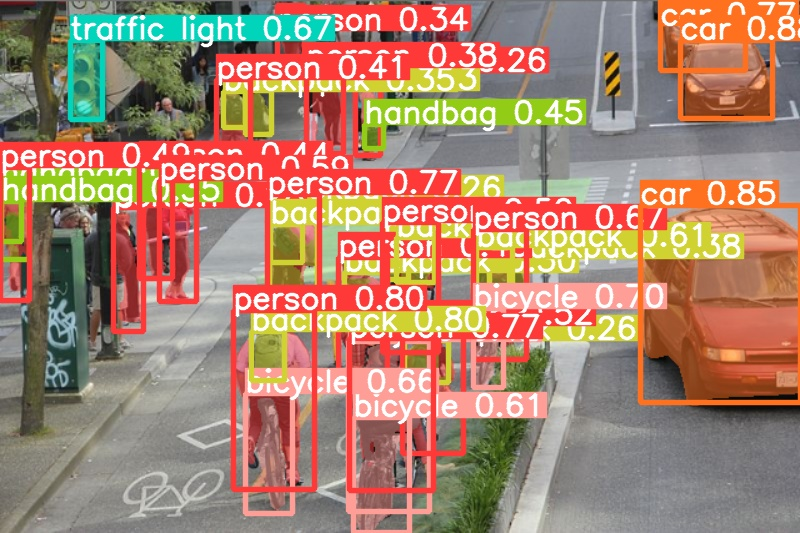

In [26]:
display.Image(filename='runs/predict-seg/exp8/sample2.jpg', width=600)

## 2. (Optional) Validate

Use the `segment/val.py` script to run validation for the model. This will show us the model's performance.

First, we need to download COCO-128.

In [27]:
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco128-seg.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../datasets && rm tmp.zip  # unzip

100%|██████████| 6.79M/6.79M [00:00<00:00, 95.6MB/s]


In [28]:
!python segment/val.py --weights yolov5s-seg.pt --data coco128-seg.yaml --img 640

segment/val: data=/content/yolov5/yolov5/data/coco128-seg.yaml, weights=['yolov5s-seg.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

100% 14.9M/14.9M [00:00<00:00, 73.4MB/s]

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
val: Scanning /content/yolov5/datasets/coco128-seg/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100% 128/128 [00:00<00:00, 929.39it/s]
val: New cache created: /content/yolov5/datasets/coco128-seg/labels/train2017.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 4/4 [00:20<00:00,  5.